# Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import Image
from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Ignore exceptions
import expectexception

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

# Load ipywidgets module
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [43]:
%%R

# Visualization
library(ggplot2)
library(ggalt)
library(ggExtra)
library(ggcorrplot)
library(ggthemes)
library(ggdendro)
library(GGally)
theme_set(theme_light())

# Tidyverse library
library(scales)
library(dplyr)
library(tidyr)
library(forcats)
library(readr)

# String manipulations
library(tools)
library(lubridate)

In [3]:
# suppress rpy2 runtime warnings
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

# Homework Answers

## a) Downloading and importing data

In [4]:
from scipy.io import arff
data = arff.loadarff('../../Homework Data/Homework 1 Data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

In [5]:
df.info() # No missing values observed
df.head()
df['class'].value_counts() # Strings encoded in byte formats for class variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.028,22.553,39.609,40.475,98.673,-0.254,b'Abnormal'
1,39.057,10.061,25.015,28.996,114.405,4.564,b'Abnormal'
2,68.832,22.218,50.092,46.614,105.985,-3.530,b'Abnormal'
3,69.297,24.653,44.311,44.644,101.868,11.212,b'Abnormal'
4,49.713,9.652,28.317,40.061,108.169,7.919,b'Abnormal'


b'Abnormal'    210
b'Normal'      100
Name: class, dtype: int64

## b) Pre-processing and EDA

### i+ii) scatterplot and boxplot

In [6]:
# Convert class 'normal' to 0 and 'abnormal' to 1 accordingly

encoding = 'utf-8'
df['class'] = df['class'].apply(lambda x: 0 if str(x, encoding) == 'Normal' else 1)

In [7]:
%%R -i df

# ggpairs takes the colour parameter as a factor only
df$class = df$class %>% as.factor

pairplot = ggpairs(df, aes(colour = class, alpha = 0.4)) +
    labs(title = 'Scatterplots and Boxplots of Independent Variables According to Class')

# Output the plot with custom figure size
png(file='./HW1_image/pairplot.png', width=1000, height=1000)
pairplot

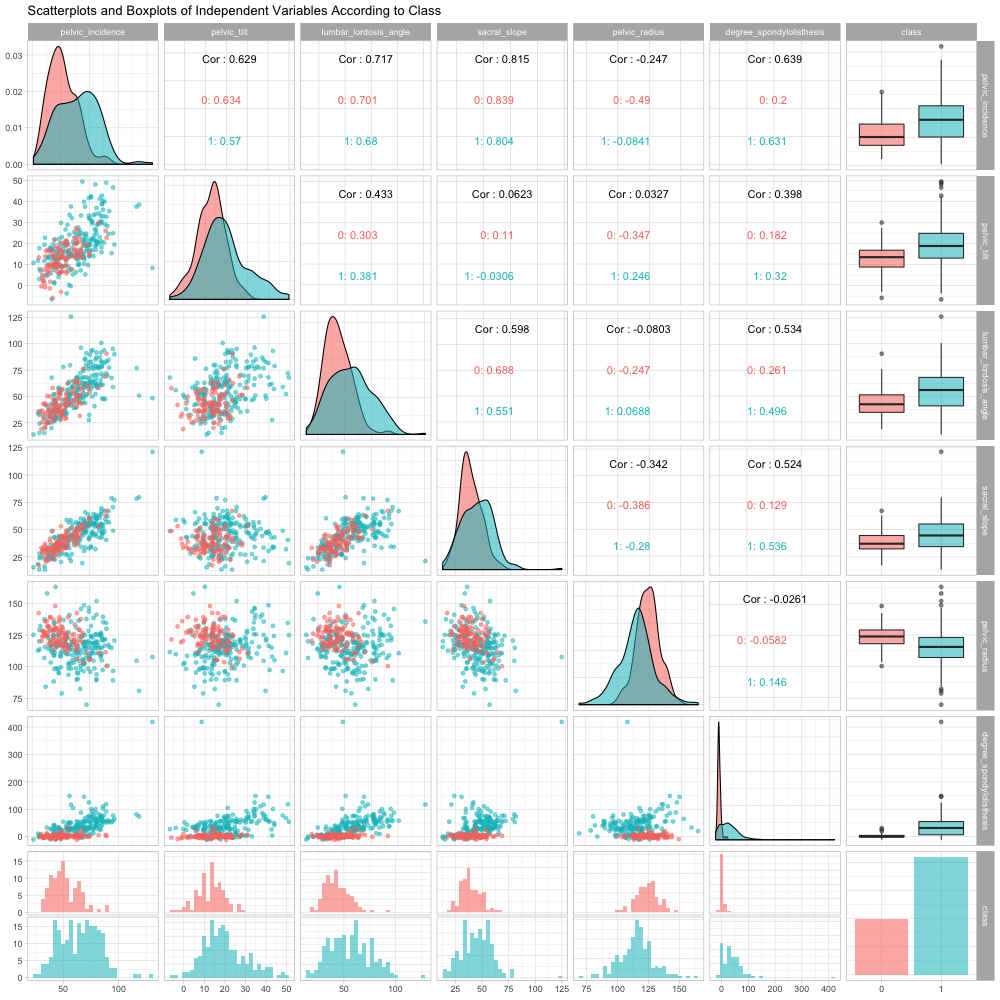

In [8]:
# Scatterplots and boxplots

Image('./HW1_image/pairplot.png')

### iii) create train and test set

In [9]:
# Create train and test set accordingly

df_train = df.iloc[np.r_[0:140, 210:280]]
df_test = df.iloc[np.r_[140:210, 280:310]]

In [10]:
# Verify that the splitting was correctly done

df_train['class'].value_counts()
df_test['class'].value_counts()

1    140
0     70
Name: class, dtype: int64

1    70
0    30
Name: class, dtype: int64

In [11]:
# Prepare data for ML

X_train = df_train.drop('class', axis = 1)
y_train = df_train['class']
X_test = df_test.drop('class', axis = 1)
y_test = df_test['class']

## c) KNN using Euclidean metric

### i) KNN code 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,210,3))[::-1]
knn = KNeighborsClassifier(n_jobs=-1)

train_score = []
test_score = []

for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=208, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=208, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=205, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=205, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=202, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=202, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=199, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=199, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=193, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=193, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=190, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=190, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=187, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=187, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=184, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=184, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=178, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=178, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=175, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=175, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=172, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=172, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=169, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=169, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=163, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=163, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=160, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=160, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=157, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=157, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=154, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=154, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=148, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=148, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=145, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=145, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=142, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=142, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=139, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=139, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=133, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=133, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=130, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=130, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=127, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=127, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=124, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=124, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=118, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=118, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=115, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=115, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=112, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=112, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=109, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=109, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=103, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=103, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=97, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=97, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=94, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=94, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=88, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=88, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=85, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=85, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=82, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=82, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=79, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=79, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=73, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=73, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=70, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=70, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=67, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=67, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=64, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=58, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=58, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=55, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=55, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=52, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=52, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=43, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=43, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=40, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=40, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

### ii) train VS test error plot & classification metrics

In [13]:
# Create error rate from 1 - score(accuracy)

train_error = 1 - np.array(train_score)
test_error = 1 - np.array(test_score)

In [14]:
error_df = pd.DataFrame(np.column_stack([k_range, train_error, test_error]),
                        columns=['k', 'train_error', 'test_error'])

In [15]:
%%R -i error_df

# Convert k from float to integer
error_df$k = error_df$k %>% as.integer

# Find the k that produces the minimum test_error
k_min_index = which.min(error_df$test_error)
k_min = error_df$k[k_min_index]
test_min = min(error_df$test_error)

# Plot
error = ggplot(error_df, aes(x=k)) +
    geom_line(aes(y=test_error, col='red'), alpha=0.8) +
    geom_line(aes(y=train_error, col='blue'), alpha=0.8) +
    scale_x_reverse() + # Reverse x axis
    geom_vline(xintercept = k_min, linetype='dashed', alpha=0.5) +
    geom_hline(yintercept = test_min, linetype='dashed', alpha=0.5) +
    geom_text(x=-15, y=0.052, label='(4, 0.06)', col='gray', size=5) +
    labs(title='Train Error VS Test Error for a KNN Classifier of Decreasing k',
         y='Error Rate') +
    scale_colour_manual(values=c('blue'='blue','red'='red'), 
                        labels=c('Train Error','Test Error'),
                        name=NULL)

png(file='./HW1_image/train_test_KNN.png', width=750, height=500)
error

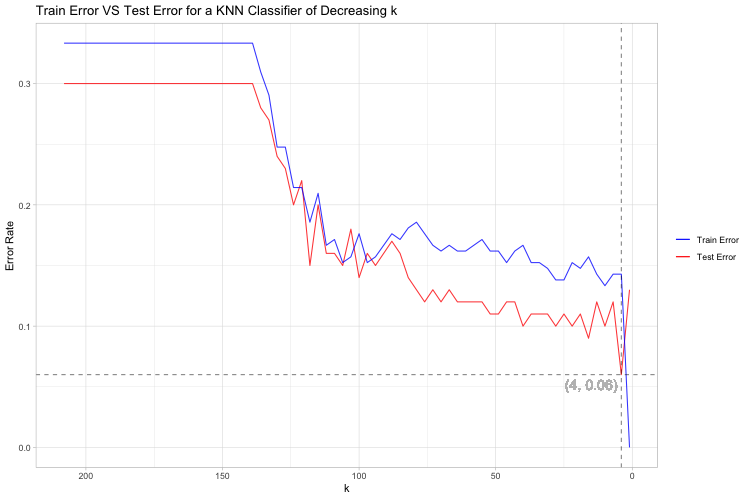

The optimal k is 4, which gives us the lowest test error of 0.06


In [16]:
# Display the train VS error graph (ii.)

Image('./HW1_image/train_test_KNN.png')
print('The optimal k is 4, which gives us the lowest test error of 0.06')

In [17]:
# Get predictions for y for k = 4

knn.set_params(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_true = np.array(y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

In [18]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Get confusion matrix (ii.)
confusion_matrix(y_true, y_pred)

# Note that Negative == Normal, Positive == Abnormal
# Get the True Negative, False Positive, False Negative and True Positive accordingly
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() # Flatten the matrix
confusion_matrix_flatten = (tn, fp, fn, tp)
confusion_matrix_flatten

array([[25,  5],
       [ 1, 69]])

(25, 5, 1, 69)

In [19]:
# Get the classification report (ii.)

print('Classification Report: \n {}'.format(classification_report(y_true, y_pred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [20]:
def true_negative_rate(tuple_):
    
    '''
    Given a tuple of (tn, fp, fn, tp), output the TNR.
    '''
    
    tn = tuple_[0]
    fp = tuple_[1]
    tnr = tn / (tn + fp)
    print('The True Negative Rate is {:.3}'.format(tnr))

In [21]:
# Get the TNR (ii.)

true_negative_rate(confusion_matrix_flatten)

The True Negative Rate is 0.833


### iii) learning curve

In [22]:
# Get indices to slice accordingly

training_n = np.arange(10,211,10)
row_class0 = (np.floor(training_n/3)) # No. of rows for class == 0
row_class1 = training_n - row_class0 # No. of rows for class == 1
df_train = df_train.reset_index(drop=True) # Reset indices so that it will be sliced properly

In [23]:
# Get test error rate for increasing sample size

max_test_score = []
for x, y, z in zip(row_class0, row_class1, training_n):
    df_train_subset = df_train.iloc[np.r_[0:y, 140:(140+x)]]
    X_train = df_train_subset.drop('class', axis=1)
    y_train = df_train_subset['class']
    k_range = np.arange(1,z,5)
    test_score = []
    for k in k_range:
        knn = KNeighborsClassifier(n_jobs=-1)
        knn.set_params(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_score.append(knn.score(X_test, y_test))
    max_test_score.append(max(test_score))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=201, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=201, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=206, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=206, p=2,
                     weights='uniform')

In [24]:
# Again, create error rate from 1 - score(accuracy)

min_test_error = 1 - np.array(max_test_score)

In [25]:
learning_curve = pd.DataFrame(np.column_stack([training_n, min_test_error]),
                              columns=['sample_size', 'min_test_error'])

In [26]:
%%R -i learning_curve

gg=ggplot(learning_curve, aes(x=sample_size, y=min_test_error)) +
    geom_line(aes(col='red')) +
    scale_x_continuous(breaks=seq(0,210,20)) +
    theme(legend.position='none') +
    labs(title='Learning Curve',
         x='Sample Size',
         y='Minimum Test Error')

png(file='./HW1_image/learning_curve.png', width=750, height=500)
gg

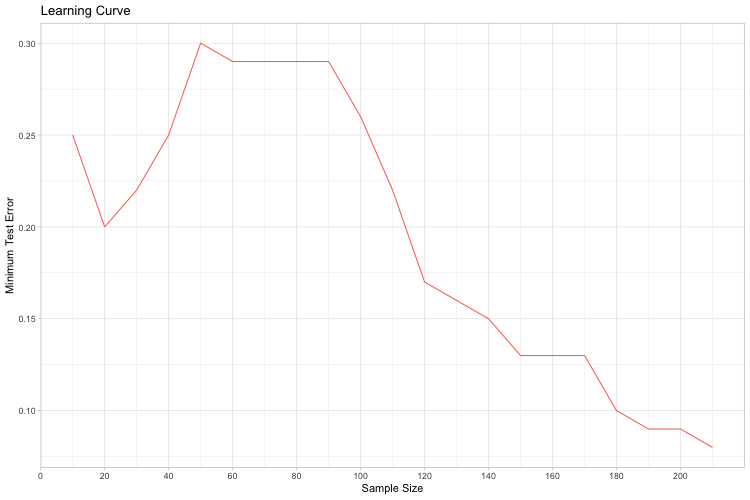

The minimum test error, 0.08, is given by using the full sample.


In [27]:
# Display the learning curve (iii.)

Image('./HW1_image/learning_curve.png')
print('The minimum test error, 0.08, is given by using the full sample.')

## d) Distance Metrics

### i) Minkowski Distance

#### A) Manhattan Distance

In [28]:
knn = KNeighborsClassifier(n_jobs=-1)
k_range = np.arange(1,200,5)

test_score_p1 = []
for k in k_range:
    knn.set_params(p=1, n_neighbors=k)
    knn.fit(X_train, y_train)
    test_score_p1.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=1,
                     weights='uniform')

In [29]:
test_score_p1 = np.array(test_score_p1)

In [30]:
# Get indices correspond to the 

max_indice = np.argwhere(test_score_p1 == max(test_score_p1)).ravel()
best_k = k_range[max_indice] # k == 1, 6, 11, 26 produce the same test error (0.11)

In [31]:
knn = KNeighborsClassifier(n_jobs=-1)
f1_scores = []
for k in best_k:
    knn.set_params(p=1, n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=1,
                     weights='uniform')

In [32]:
f1_scores=np.array(f1_scores)
best_k[np.argwhere(f1_scores == max(f1_scores)).ravel()] # k == 11, 26 gives the best f1 score

array([11, 26])

#### B) Variating p with k = 11

In [33]:
# For our purpose, we will use k = 11

log_p_range = np.logspace(0.1, 1, 10)
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

test_score_plog = []
f1_plog = []
for p in log_p_range:
    knn.set_params(p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_score_plog.append(knn.score(X_test, y_test))
    f1_plog.append(f1_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=1.2589254117941673, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=1.2589254117941673, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=1.5848931924611136, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=1.5848931924611136, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=1.9952623149688797, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=1.9952623149688797, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=2.51188643150958, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=2.51188643150958, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=3.1622776601683795, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=3.1622776601683795, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=3.9810717055349722, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=3.9810717055349722, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=5.011872336272724, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=5.011872336272724, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=6.309573444801933, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=6.309573444801933, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=7.943282347242816, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11,
                     p=7.943282347242816, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=10.0,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=10.0,
                     weights='uniform')

In [34]:
1 - np.array(test_score_plog)
f1_plog # Best log(p) are 0.2, 0.8, 0.9, 1 with test error of 0.11

array([0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11, 0.11])

[0.9261744966442954,
 0.9271523178807948,
 0.9210526315789475,
 0.9210526315789475,
 0.9210526315789475,
 0.9210526315789475,
 0.9210526315789475,
 0.9271523178807948,
 0.9271523178807948,
 0.9271523178807948]

#### C) Chebyshev Distance

In [35]:
knn = KNeighborsClassifier(n_jobs=-1, metric='chebyshev')

test_score_cheby = []
for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_score_cheby.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='uniform')

In [36]:
test_error_cheby = 1 - np.array(test_score_cheby)
test_error_cheby
k_range[test_error_cheby.argmin()] # k == 16 produces a test error of 0.08

array([0.13, 0.09, 0.12, 0.08, 0.11, 0.12, 0.12, 0.1 , 0.13, 0.12, 0.12,
       0.12, 0.14, 0.13, 0.14, 0.11, 0.14, 0.12, 0.15, 0.14, 0.19, 0.18,
       0.18, 0.18, 0.21, 0.21, 0.25, 0.28, 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ])

16

### ii) Mahalanobis Distance

In [37]:
knn = KNeighborsClassifier(n_jobs=-1,
                           metric='mahalanobis', 
                           algorithm='brute', 
                           metric_params={'V': np.cov(X_train.values.T)})

test_score_mahal = []
for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_score_mahal.append(knn.score(X_test, y_test))

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=6, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=6, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=11, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=11, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=16, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=16, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=21, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=21, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=26, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=26, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=31, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=31, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=36, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=36, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=41, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=41, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=46, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=46, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=51, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=51, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=56, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=56, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=61, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=61, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=66, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=66, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=71, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=71, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=76, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=76, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=81, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=81, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=86, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=86, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=91, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=91, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=96, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=96, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=101, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=101, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=106, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=106, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=111, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=111, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=116, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=116, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=121, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=121, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=126, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=126, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=131, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=131, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=136, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=136, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=141, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=141, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=146, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=146, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=151, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=151, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=156, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=156, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=161, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=161, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=166, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=166, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=171, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=171, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=176, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=176, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=181, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=181, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=186, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=186, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=191, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=191, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=196, p=2, weights='uniform')

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 278.82038721,   90.58270764,  206.38680802,  188.23767958,
         -33.53528338,  433.68129872],
       [  90.58270764,   83.37411393,   58.07440958,    7.20859371,
           2.39277702,  115.47132368],
       [ 206.38680802,   58.07440958,  285.45684491,  148.31239844,
          -1.91262006,  299.20987182],
       [ 188.23767958,    7.20859371,  148.31239844,  181.02908587,
         -35.9280604 ,  318.20997504],
       [ -33.53528338,    2.39277702,   -1.91262006,  -35.9280604 ,
         130.99950587,    3.52844533],
       [ 433.68129872,  115.47132368,  299.20987182,  318.20997504,
           3.52844533, 1580.04360247]])},
                     n_jobs=-1, n_neighbors=196, p=2, weights='uniform')

In [38]:
test_error_mahal = 1 - np.array(test_score_mahal)
test_error_mahal
k_range[np.argwhere(test_error_mahal == min(test_error_mahal))] # k == 16, 21, 31, 36 produce a test error of 0.19

array([0.34, 0.3 , 0.21, 0.19, 0.19, 0.2 , 0.19, 0.19, 0.23, 0.22, 0.24,
       0.26, 0.25, 0.24, 0.26, 0.26, 0.27, 0.28, 0.27, 0.29, 0.3 , 0.32,
       0.32, 0.32, 0.32, 0.32, 0.32, 0.33, 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ])

array([[16],
       [21],
       [31],
       [36]])

**Summary**

Minkowski Distance: \
p = 1: 0.11 \
log(p) = 0.2, 0.8, 0.9, 1: 0.11 \
p = infinity: 0.08

Mahalanobis Distance: 0.19

## e) Weighted decision

In [39]:
# Euclidean

knn = KNeighborsClassifier(n_jobs=-1,
                           weights='distance')

test_score_weighted_euclidean = []

for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_score_weighted_euclidean.append(knn.score(X_test, y_test))
    
test_error_weighted_euclidean = 1 - np.array(test_score_weighted_euclidean)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='distance')

In [40]:
# Manhattan

knn = KNeighborsClassifier(n_jobs=-1,
                           weights='distance',
                           p=1)

test_score_weighted_manhattan = []

for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_score_weighted_manhattan.append(knn.score(X_test, y_test))
    
test_error_weighted_manhattan = 1 - np.array(test_score_weighted_manhattan)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=1,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=1,
                     weights='distance')

In [41]:
# Chebyshev

knn = KNeighborsClassifier(n_jobs=-1,
                           weights='distance',
                           metric='chebyshev')

test_score_weighted_chebyshev = []

for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_score_weighted_chebyshev.append(knn.score(X_test, y_test))
    
test_error_weighted_chebyshev = 1 - np.array(test_score_weighted_chebyshev)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=31, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=41, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=51, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=56, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=61, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=66, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=71, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=76, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=81, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=86, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=91, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=96, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=106, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=111, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=116, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=121, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=126, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=131, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=136, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=141, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=146, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=151, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=156, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=161, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=166, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=171, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=176, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=181, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=186, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=191, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=196, p=2,
                     weights='distance')

In [42]:
min(test_error_weighted_euclidean) # 0.10
min(test_error_weighted_manhattan) # 0.10
min(test_error_weighted_chebyshev) # 0.11

0.09999999999999998

0.09999999999999998

0.10999999999999999

## f) Lowest training error rate

The lowest training error rate obtained is 0 when n = 1, in which the nearest neighbor of every point is itself, leading to a natural error rate of 0.